In [23]:
#load in the packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics


In [2]:
#import the dataframe
df = pd.read_csv('sports_survey_2021.csv')

In [3]:
#clean the data
df_cleaned = df.dropna(subset=['S15r1', 'VL1r1'])


In [4]:
#Independent Variable S15r1 - NFL Fandom 1-6
#Control Variables: S2(Gender), S2(Age), S4r1(White), S4r2(Black), S4r3(Asian), S4r4(Latino), D4(HH Income), D5(Employment), D6(Education)
#Dependent Variable: VL1r1(went to game), VL1r4(placed a bet)

In [5]:
X = df_cleaned[['S15r1']].values
y = df_cleaned['VL1r1'].values


In [6]:
#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
log_reg = LogisticRegression(penalty=None)
log_reg.fit(X,y)
print(f'sklearn obtains the fit m = {log_reg.coef_[0][0]} and b = { log_reg.intercept_[0]}')

sklearn obtains the fit m = 0.3514039363634479 and b = -2.42189637565954


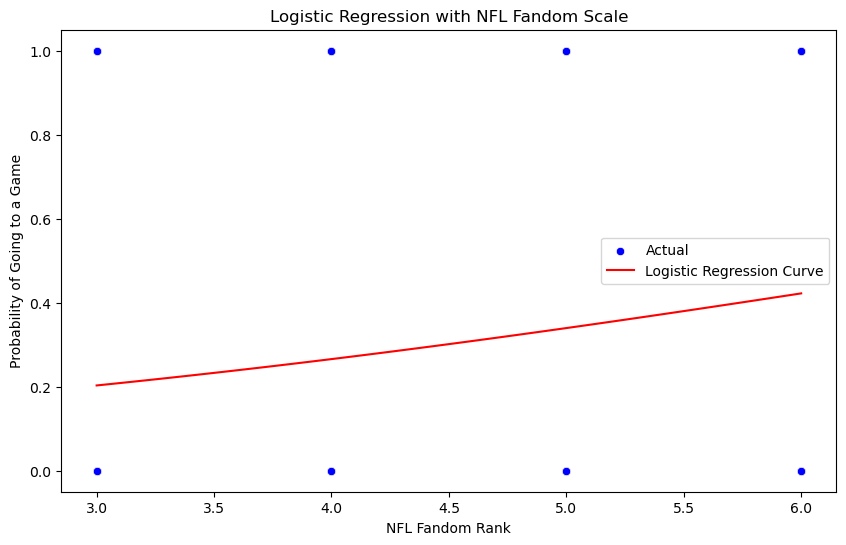

In [10]:

# Define the independent variable (X) and the dependent variable (y)
X = df_cleaned[['S15r1']]
y = df_cleaned['VL1r1']

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Generate predicted probabilities for the entire dataset
df_cleaned.loc[:, 'Predicted'] = model.predict_proba(X)[:, 1]

# Scatter plot of actual data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='S15r1', y='VL1r1', data=df_cleaned, color='blue', label='Actual')

# Plot the logistic regression curve
s15r1_values = np.linspace(df_cleaned['S15r1'].min(), df_cleaned['S15r1'].max(), 100)
s15r1_values_df = pd.DataFrame(s15r1_values, columns=['S15r1'])
predicted_probabilities = model.predict_proba(s15r1_values_df)[:, 1]
plt.plot(s15r1_values, predicted_probabilities, color='red', label='Logistic Regression Curve')

# Customize the plot
plt.xlabel('NFL Fandom Rank')
plt.ylabel('Probability of Going to a Game')
plt.title('Logistic Regression with NFL Fandom Scale')
plt.legend()
plt.show()


In [12]:
model.classes_

array([0., 1.])

In [13]:
model.intercept_

array([-2.42115638])

In [14]:
model.coef_

array([[0.35125583]])

In [18]:
model.predict_proba(X)
model.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
#model score
model.score(X, y)

NameError: name 'confusion_matrix' is not defined

In [ ]:
#Try to run a confusion matrix